In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
from scipy.constants import Boltzmann

%matplotlib widget

In [2]:
def konsentrasjon(x, D_t, x_0):
    c = 1 / 2 - 1 / 2 * erf((x - x_0) / np.sqrt(4 * D_t))
    return c

C:\Users\ivism\AppData\Local\Temp\ipykernel_11884\3997267497.py:2: RuntimeWarning: invalid value encountered in sqrt
  c = 1 / 2 - 1 / 2 * erf((x - x_0) / np.sqrt(4 * D_t))


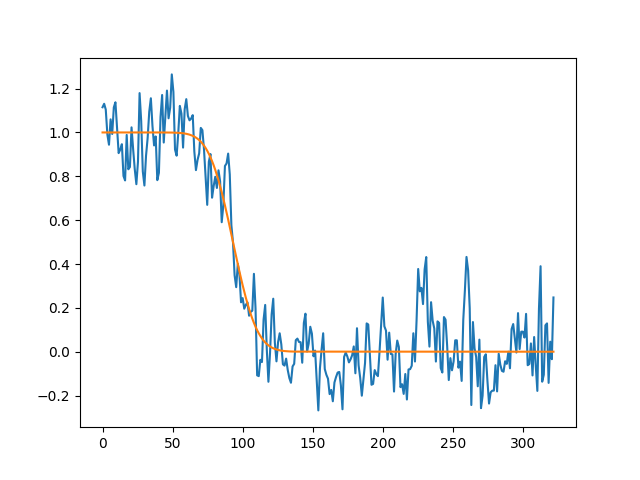

D * t = 88.71701274304174


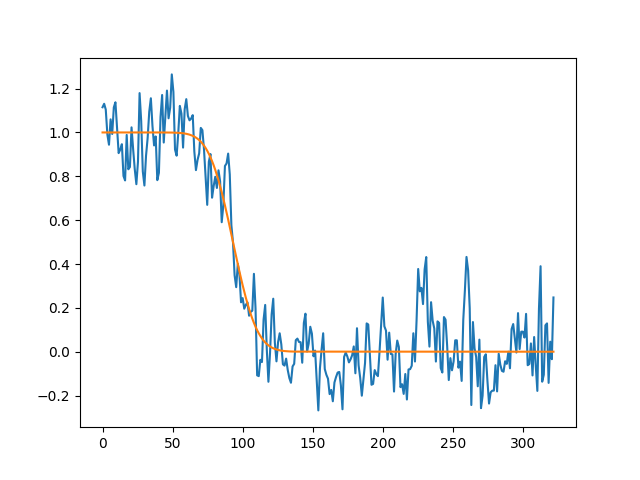

In [3]:
df = pd.read_csv("./resultater/bilde_3_strek_1_768um.csv")
xvals = np.array(df["Distance_(um)"])
intensity = np.array(df["Gray_Value"])

idxs = xvals < 330
xvals = xvals[idxs]
intensity = intensity[idxs]
idxs = xvals > 8
xvals = xvals[idxs]
intensity = intensity[idxs]

xvals = np.max(xvals) - xvals

absorbance = - np.log10(intensity)

absorbance -= np.mean(absorbance[xvals > 120])
absorbance /= np.mean(absorbance[xvals < 66])

# Her er absorbans proporsjonal med konsentrasjon, men siden absoluttverdien ikke har noe å si for den endelige D-verdien kan vi 

params, _ = curve_fit(f=konsentrasjon, xdata=xvals, ydata=absorbance)

fig, ax = plt.subplots()
ax.plot(xvals, absorbance)
ax.plot(xvals, konsentrasjon(xvals, *params))
fig.show()

D_1 = params[0]
l_1 = 768 #um
print(f"D * t = {params[0]}")

C:\Users\ivism\AppData\Local\Temp\ipykernel_11884\3997267497.py:2: RuntimeWarning: invalid value encountered in sqrt
  c = 1 / 2 - 1 / 2 * erf((x - x_0) / np.sqrt(4 * D_t))


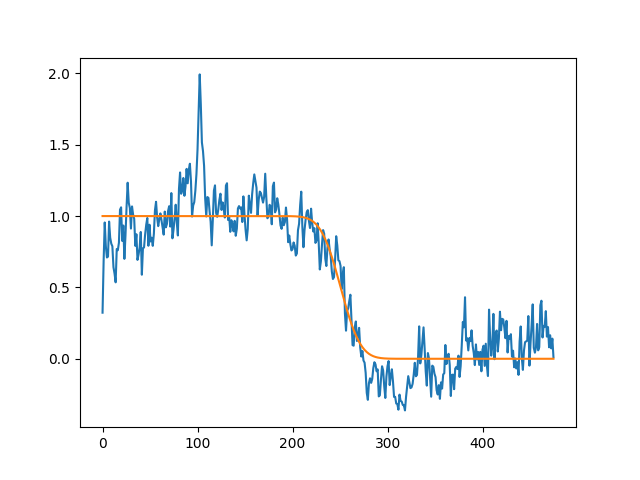

D * t = 134.68380933041297


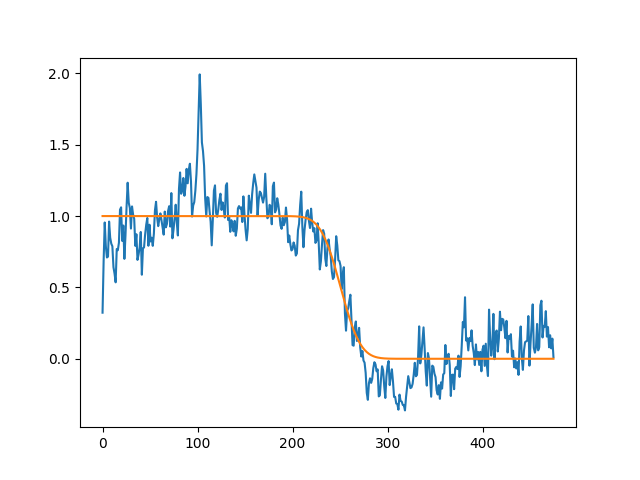

In [4]:
df = pd.read_csv("./resultater/bilde_3_strek_2_1297um.csv")
xvals = np.array(df["Distance_(um)"])
intensity = np.array(df["Gray_Value"])

absorbance = - np.log10(intensity)

absorbance -= np.mean(absorbance[xvals > 283])
absorbance /= np.mean(absorbance[xvals < 230])

# Her er absorbans proporsjonal med konsentrasjon, men siden absoluttverdien ikke har noe å si for den endelige D-verdien kan vi 

params, _ = curve_fit(f=konsentrasjon, xdata=xvals, ydata=absorbance)

fig, ax = plt.subplots()
ax.plot(xvals, absorbance)
ax.plot(xvals, konsentrasjon(xvals, *params))
fig.show()

D_2 = params[0]
l_2 = 1297 # um
print(f"D * t = {params[0]}")

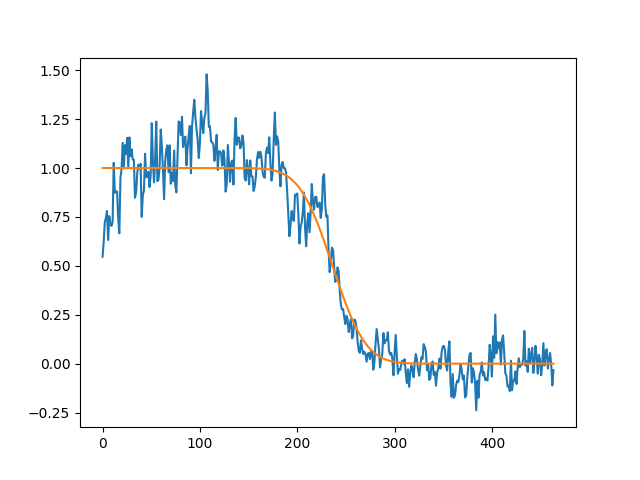

D * t = 359.88834962685274


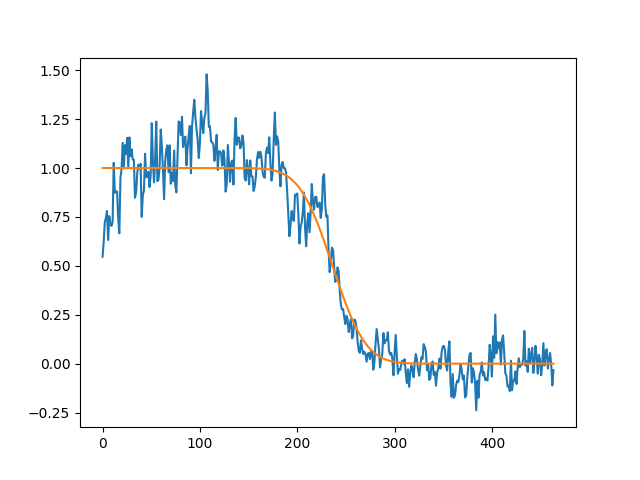

In [5]:
df = pd.read_csv("./resultater/bilde_3_strek_3_1931um.csv")
xvals = np.array(df["Distance_(um)"])
intensity = np.array(df["Gray_Value"])

absorbance = - np.log10(intensity)

absorbance -= np.mean(absorbance[xvals > 263])
absorbance /= np.mean(absorbance[xvals < 215])

# Her er absorbans proporsjonal med konsentrasjon, men siden absoluttverdien ikke har noe å si for den endelige D-verdien kan vi 

params, _ = curve_fit(f=konsentrasjon, xdata=xvals, ydata=absorbance)

fig, ax = plt.subplots()
ax.plot(xvals, absorbance)
ax.plot(xvals, konsentrasjon(xvals, *params))
fig.show()

D_3 = params[0]
l_3 = 1931 # um
print(f"D * t = {params[0]}")

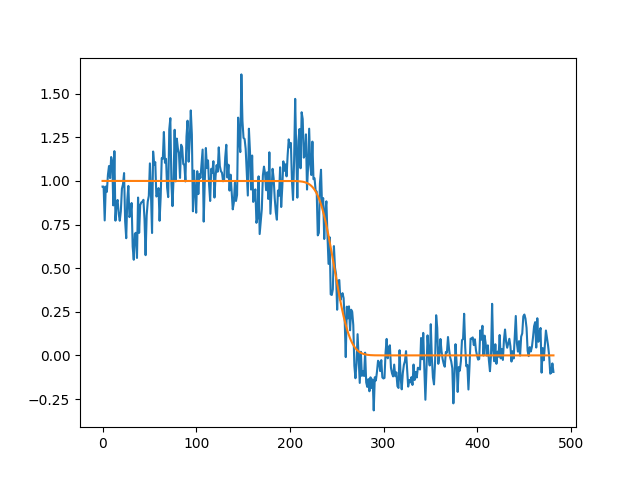

D * t = 83.71666964525605


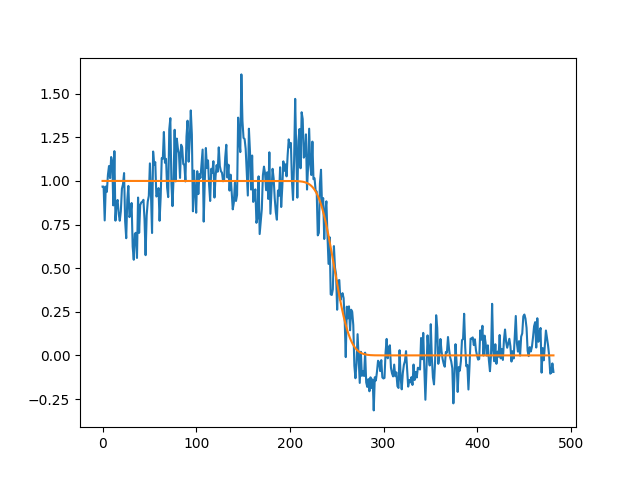

In [6]:
df = pd.read_csv("./resultater/bilde_3_strek_4_2593um.csv")
xvals = np.array(df["Distance_(um)"])
intensity = np.array(df["Gray_Value"])

absorbance = - np.log10(intensity)

absorbance -= np.mean(absorbance[xvals > 260])
absorbance /= np.mean(absorbance[xvals < 200])

# Her er absorbans proporsjonal med konsentrasjon, men siden absoluttverdien ikke har noe å si for den endelige D-verdien kan vi 

params, _ = curve_fit(f=konsentrasjon, xdata=xvals, ydata=absorbance)

fig, ax = plt.subplots()
ax.plot(xvals, absorbance)
ax.plot(xvals, konsentrasjon(xvals, *params))
fig.show()

D_4 = params[0]
l_4 = 2593 # um
print(f"D * t = {params[0]}")

In [7]:
def get_t(len): # um
    flow_rate = 20 # ul/min
    flow_rate = flow_rate * 2 # to sprøyter
    flow_rate = flow_rate/60 # ul/sec
    width = 500 # um
    height = 75 # um
    vol = width * height * len # um^3
    vol = vol * 10**-9 # ul
    return vol/flow_rate

ls = np.array([l_1, l_2, l_3, l_4])
ts = get_t(ls)

Dts = np.array([D_1, D_2, D_3, D_4]) # D*t
Ds = Dts/ts # D
pprint(Ds)

array([2053.63455424, 1846.09007906, 3313.31698834,  573.96696847])


In [8]:
def get_size(D):
    D = D / 10**12
    T = 290 # K
    eta = 1e-3
    return Boltzmann * T / (6 * np.pi * eta * D)

sizes = get_size(Ds)
pprint(sizes)

array([1.03432493e-10, 1.15060768e-10, 6.41087295e-11, 3.70077991e-10])
